In [2]:
from copy import deepcopy
from datetime import datetime
from IPython.display import HTML
import json
import pandas as pd
from arcgis.gis import GIS
import arcgis.network as network
import arcgis.geocoding as geocoding

In [31]:
user_name = 'minlaxz'
password = 'passwordis$tr0ng'
my_gis = GIS('https://www.arcgis.com', user_name, password)

In [4]:
route_service_url = my_gis.properties.helperServices.route.url
route_service_url

'https://route.arcgis.com/arcgis/rest/services/World/Route/NAServer/Route_World'

In [5]:
route_service = network.RouteLayer(route_service_url, gis=my_gis)
route_service

<RouteLayer url:"https://route.arcgis.com/arcgis/rest/services/World/Route/NAServer/Route_World">

<Item title:"ArcGIS Online Directions and Routing Services Coverage" type:Web Map owner:esri>
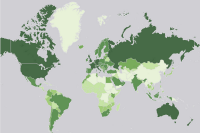

In [6]:
my_gis.content.search('title: ArcGIS Online Directions and Routing Services Coverage type:Web Map owner:esri',
                      item_type='Web Map', outside_org=True)[0]

<Item title:"World Traffic Map" type:Web Map owner:esri>
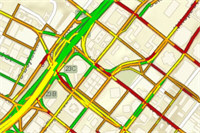

In [7]:
my_gis.content.search('title: World Traffic Map type:Web Map owner:esri',
                      item_type='Web Map', outside_org=True)[0]

In [8]:
route_layer = network.RouteLayer(route_service_url, gis=my_gis)
result = route_layer.solve(stops='''18.068598,59.329268; 18.068598,59.429268''',
                           return_directions=False, return_routes=True, 
                           output_lines='esriNAOutputLineNone',
                           return_barriers=False, return_polygon_barriers=False, 
                           return_polyline_barriers=False)

travel_time = result['routes']['features'][0]['attributes']['Total_TravelTime']
print("Total travel time is {0:.2f} min".format(travel_time))

Total travel time is 18.91 min


In [9]:
stop1_address = '1200 E Colton Ave, Redlands, CA 92374'
stop2_address = '11711 Sand Canyon Rd, Yucaipa, CA 92399'

stop1_geocoded = geocoding.geocode(stop1_address)
stop2_geocoded = geocoding.geocode(stop2_address)

stops = '{0},{1}; {2},{3}'.format(stop1_geocoded[0]['attributes']['X'],
                                  stop1_geocoded[0]['attributes']['Y'],
                                  stop2_geocoded[0]['attributes']['X'],
                                  stop2_geocoded[0]['attributes']['Y'])

route_layer = network.RouteLayer(route_service_url, gis=my_gis)
result = route_layer.solve(stops=stops, return_directions=False, return_routes=True, 
                           output_lines='esriNAOutputLineNone', return_barriers=False, 
                           return_polygon_barriers=False, return_polyline_barriers=False)

travel_time = result['routes']['features'][0]['attributes']['Total_TravelTime']
print("Total travel time is {0:.2f} min".format(travel_time))

Total travel time is 8.33 min


geocoding.geocode('Yangon No.2 Rd')[0]

In [10]:
route_layer = network.RouteLayer(route_service_url, gis=my_gis)
input_stops = json.loads('''{"features": [
{"geometry": {"x": -13108894.078499999, "y": 4034551.2082, 
"spatialReference": {"wkid":3857, "latestWkid":3857}},
"attributes": {"Name": "945 Azalea Dr, Pomona, California"}}, 
{"geometry": {"x": -13105731.496399999, "y": 4038487.7151999995, 
"spatialReference": {"wkid":3857, "latestWkid":3857}},
"attributes": {"Name":"1321 Loranne Ave, Pomona, California"}}]}''')

result = route_layer.solve(stops=input_stops, return_directions=False, return_routes=True, 
                           output_lines='esriNAOutputLineNone', return_barriers=False, 
                           return_polygon_barriers=False, return_polyline_barriers=False)

total_distance = result['routes']['features'][0]['attributes']['Total_Kilometers']
print("Total distance is {0:.2f} km".format(total_distance))

Total distance is 5.89 km


In [40]:
#stops = '''-3.203062,55.906437; -3.190080,55.935570'''
start = '96.217989,16.807021'
end = '96.207368,16.8128586'
stops = start+';'+end

In [41]:
import datetime

start_time = int(datetime.datetime.utcnow().timestamp() * 1000)

route_layer = network.RouteLayer(route_service_url, gis=my_gis)
result = route_layer.solve(stops=stops, 
                           directions_language='en-US', return_routes=False,
                           return_stops=False, return_directions=True,
                           directions_length_units='esriNAUKilometers',
                           return_barriers=False, return_polygon_barriers=False,
                           return_polyline_barriers=False, start_time=start_time,
                           start_time_is_utc=True)

In [42]:
records = []
travel_time, time_counter = 0, 0
distance, distance_counter = 0, 0

for i in result['directions'][0]['features']:
    time_of_day = datetime.datetime.fromtimestamp(i['attributes']['arriveTimeUTC'] / 1000).strftime('%H:%M:%S')
    time_counter = i['attributes']['time']
    distance_counter = i['attributes']['length']
    travel_time += time_counter
    distance += distance_counter
    records.append( (time_of_day, i['attributes']['text'], 
                     round(travel_time, 2), round(distance, 2))  )    

In [43]:
result['directions'][0]['features'][0]['attributes']['arriveTimeUTC'] / 1000

1571658856.96

In [44]:
pd.set_option('display.max_colwidth', 100)
df = pd.DataFrame.from_records(records, index=[i for i in range(1, len(records) + 1)], 
                               columns=['Time of day', 'Direction text', 
                                        'Duration (min)', 'Distance (km)'])
HTML(df.to_html(index=False))

Time of day,Direction text,Duration (min),Distance (km)
18:24:16,Start at Location 1,0.00,0.00
18:24:16,Go west,0.05,0.04
18:24:19,Keep left at the fork,1.83,1.37
18:26:06,Turn left,2.56,1.76
18:26:50,Turn right,3.01,2.00
18:27:17,Turn left,4.05,2.56
18:28:20,Turn left,4.38,2.73
18:28:39,"Finish at Location 2, on the left",4.38,2.73


In [23]:
stops = '''-3.203062,55.906437; -3.190080,55.935570'''

route_layer = network.RouteLayer(route_service_url, gis=my_gis)
result = route_layer.solve(stops=stops, 
                           directions_language='en-US', return_routes=True,
                           return_stops=True, return_directions=False,
                           return_barriers=False, return_polygon_barriers=False,
                           return_polyline_barriers=False)

In [24]:
my_map = my_gis.map('Braidburn Valley', zoomlevel=14)
my_map

MapView(layout=Layout(height='400px', width='100%'), zoom=14.0)

In [33]:
my_gis

GIS @ https://minlaxz.maps.arcgis.com version:7.3

In [45]:
start_time

1571658856960